# Miniprojekt zur Textklassifikation mit Naive Bayes

## Teil 1: Theorie
Lesen Sie [Sebastian Raschkas Artikel](http://sebastianraschka.com/Articles/2014_naive_bayes_1.html) über das Naive Bayes Verfahren und beantworten Sie folgende Fragen:
1. Weshalb ist *zusätzliche Glättung* hilfreich? Wie nennt sich dieses Verfahren in unserem Theorieteil?
2. Was versteht man unter dem Begriff *Stop Word*?
3. Warum eignet sich das *Multi-variate Bernoulli Naive Bayes Verfahren* für die Spam-Erkennung?

### 1.1 Weshalb ist *zusätzliche Glättung* hilfreich?

Ausprägungen unserer Features, die im Trainingsdatensatz nicht vorkommen, führen dazu, dass die **klassenbedingte Wahrscheinlichkeit** hierfür bei 0 liegt. Dies hat zur Folge, dass auch die a-posteriori Wahrscheinlichkeit hierfür stets bei 0 liegen wird. Um dieses Problem zu umgehen, wird ein zusätzlicher Parameter $\alpha$ im Bayes-Modell addiert. Dies nennt man häufig auch *Lidstone*-Glättung oder *Laplace*-Glättung.

### 1.2 Was versteht man unter dem Begriff *Stop Word*?

Ein "Stop Word" ist ein Wort, welches für Erkennung des Textinhaltes/Klassifikation keinen Informationsgewinn bedeutet (sie widersprechen damit den Kriterien der **Auffälligkeit** (engl. *salience*) und der **Unterscheidungsfähigkeit** (engl. *discrimination*).

Typischerweise sind dies Artikel, Konjunktionen etc. Möglichkeiten zum Ausfiltern dieser Wörter vor der Modellbildung sind der Abgleich gegen ein "Stop-Word" Wörterbuch der betrachteten Sprache(n). Möglich ist auch aus den Testdaten eine geordnete Liste mit den Häufigkeiten der verwendeten Wörter zu erstellen. Hieraus kann man nun händisch eine Liste mit Stop-Words erstellen und diese aus den Testdaten herausnehmen.

### 1.3 Warum eignet sich das *Multi-variate Bernoulli Naive Bayes Verfahren* für die Spam-Erkennung?

Für eine allgemeine Textklassifikation ist das Multi-variate-Bernoulli Naive Bayes Verfahren theoretisch dem Multinomialen Modell unterlegen, da hier die Häufigkeit eines Feautures nicht berücksichtigt wird, sondern nur, ob es überhaupt vorkommt oder nicht. Allerdings ist für die Güte eines Modells für die Spamerkennung vielmehr die Auswahl des Vokabulars (Herausnehmen von Stop-Words etc.) entscheidend. Es kommt hier also ganz entscheidend auf eine gute *Data Preparation* an!

## Teil 2: KDD-Prozess und CRISP-DM
Recherchieren Sie, was es mit dem KDD-Prozess auf sich hat. Welchen Zusammenhang mit dem CRISP-DM bzw. welche Unterschiede zum CRISP-DM sehen Sie? Versuchen Sie die Schritte zur Lösung der *Data Mining Aufgabe* bestehend aus den Teilen 3 und 4 unten den Phasen des KDD-Prozesses zuzuordnen.

## Teil 3: Modellerstellung für Sentiment-Analyse
Führen Sie mit dem Datensatz `../data/amazon_cells_labelled.txt` des Papers [From Group to Individual Labels using Deep Features', Kotzias et. al,. KDD 2015](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences) eine Sentiment-Analyse durch. Es soll ein Modell generiert werden, mit dessen Hilfe eine Bewertung auf Amazon als *positiv* oder *negativ* eingestuft werden kann. 

Weitere Informationen zur Sentiment-Analyse und NLP-Verfahren im Allgemeinen finden Sie in Kapitel 8 des Buches [Python Machine Learning](https://www.packtpub.com/big-data-and-business-intelligence/python-machine-learning) von [Sebastian Raschka](https://sebastianraschka.com/blog/index.html). Dort wird zwar kein Naive Bayes-Modell verwendet, die Schritte Data Understanding und Data Preparation laufen aber sehr ähnlich ab.

#### Hinweis
* Lesen Sie die Daten korrekt als *pandas Dataframe* ein und vergeben Sie sinnvolle Namen für die Spalten.
* Überprüfen Sie die Balance der Daten. Wieviele Bewertungen sind positiv, wieviele negativ? Können Sie sicher stellen, dass diese Balance auch in den Trainings- und Testdaten die gleiche ist (hierzu ist der Begriff "stratification" hilfreich ...)?
* Bewerten Sie das Ergebnis immer mit Bezug auf die Null-Accuracy. Das ist die Genauigkeit, die ein Modell erzielt, welches stupide die häufigste Merkmalsausprägung annimmt. Ist ihr Modell besser oder schlechter als die Null-Accuracy?

#### Import der Bibliotheken

In [1]:
import numpy as np
import pandas as pd
import sklearn.model_selection as ms
import sklearn.feature_extraction.text as text
import sklearn.naive_bayes as nb
import matplotlib.pyplot as plt

#### Einlesen der Daten

In [2]:
# Daten sind durch Tab getrennt und haben keinen header.
df_ama = pd.read_csv('../data/amazon_cells_labelled.txt', sep='\t', header=None, names=['Comment', 'Label'])
df_ama.head()

,Comment,Label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


#### Überprüfen der Balance der Daten

In [3]:
df_ama.groupby('Label').count()

,Comment
Label,
0,500
1,500


Es liegt also ein perfekt ausbalancierter Datensatz vor. Das ist in der Realität selten der Fall...

#### Erstellung der Merkmalsmatrix und des Label-Vektors

In [4]:
# Tfidf-Vektorisierer mit den default-Einstellungen wird angewendet. 
tf = text.TfidfVectorizer()
X_vec_ama = tf.fit(df_ama['Comment'])
X_ama = X_vec_ama.transform(df_ama['Comment'])
print(X_ama.shape)

(1000, 1847)


In [5]:
print("Die Merkmalsmatrix hat ~{0:.2f}% von Null verschiedene Einträge.".format(
          100 * X_ama.nnz / float(X_ama.shape[0] * X_ama.shape[1])))

Die Merkmalsmatrix hat ~0.49% von Null verschiedene Einträge.


In [6]:
# Erstellen des Label-Vektors
y_ama = df_ama['Label']

#### Aufteilung der Daten

In [7]:
# Aufteilung der Daten in Trainings- und Testdaten
(X_train, X_test, y_train, y_test) = ms.train_test_split(
    X_ama, y_ama, test_size=.2, random_state = 17, stratify=y_ama)

##### Einfache Überprüfung der Stratifikation
Erstmal für die Trainingsdaten ...

In [8]:
print('Es gibt {} Trainingsdaten, davon {} positive'.format(y_train.count(), y_train.sum()))

Es gibt 800 Trainingsdaten, davon 400 positive


... und zur Sicherheit auch noch für die Testdaten

In [9]:
print('Es gibt {} Testdaten, davon {} positive'.format(y_test.count(), y_test.sum()))

Es gibt 200 Testdaten, davon 100 positive


#### Training des Modells

In [10]:
# Training des Bernoulli
bnb = ms.GridSearchCV(nb.MultinomialNB(), param_grid={'alpha':np.logspace(-2., 2., 50)}, cv=5)
bnb.fit(X_train, y_train)
bnb.score(X_test, y_test)

0.815

Das ist +31,5% besser als die Null-Accuracy. Bedenkt man die erhöhte Komplexität der Aufgabe und die Einfachheit des NB-Algorithmus ist das Ergebnis nicht zu verachten.

## Teil 4: Anwendung des Modells: Bewertungen anderer Plattformen
Testen Sie ihr Amazon-Modell anhand der Bewertungen bei IMDB und Yelp. Diese finden Sie im gleichen Ordner unter `imdb_labelled.txt` und `yelp_labelled.txt`. Inwiefern ist das Amazon-Modell für die anderen Datensätze brauchbar?

#### Hinweis
* Damit die Übertragung des Modells gelingt, muss die Merkmalsmatrix der neuen Daten die gleiche Struktur aufweisen. Das trainierte Modell kann schließlich keine Wörter bewerten, die es nicht kennt!
* Achten Sie erneut auf die Balance der Daten. Stichwort: Null-Accuracy!
* Um die Güte eines Modells zu bestimmen, kann es sinnvoll sein, eine Confusion-Matrix aufzustellen. In Scikit-learn ist diese im Paket [metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) zu finden. Eine schöne Option zum Plot ist in [mlxtend](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/) enthalten.

### 4.1 Test mit IMDB

#### Einlesen der Daten

In [11]:
df_imdb =  pd.read_csv('../data/imdb_labelled.txt', sep='\t', 
                       header=None, names=['Comment', 'Label'])
df_imdb.head()

,Comment,Label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


#### Überprüfen der Balance der Daten

In [12]:
df_imdb.groupby('Label').count()

,Comment
Label,
0,362
1,386


Auch hier ist der Datensatz ausbalanciert.

Nun folgt die Transformation in die Amazon-Merkmalsmatrix:

In [13]:
X_imdb = X_vec_ama.transform(df_imdb['Comment'])

**Hinweis**: Bei diesem Schritt gehen Wörter verloren, die zwar im IMDB-Datensatz enthalten sind, aber nicht im Amazon-Datensatz vorkommen. Es findet also ein Verlust von Informationen statt!

In [14]:
y_imdb = df_imdb['Label']

#### Test des Modells

In [15]:
print("Die Genauigkeit beträgt ~{0:.2f}% .".format(100*bnb.score(X_imdb, y_imdb)))

Die Genauigkeit beträgt ~66.71% .


Und zum Vergleich nun die Null-Accuracy:

In [16]:
imdb_nmb = y_imdb.count()
imdb_nmbpos = np.count_nonzero(y_imdb)
imdb_nmbneg = imdb_nmb - imdb_nmbpos
if imdb_nmbpos >= imdb_nmbneg:
    print('Die Null-Accuracy ist das Verhältnis der positiven Bewertungen zu allen')
else:
    print('Die Null-Accuracy ist das Verhältnis der negativen Bewertungen zu allen')

Die Null-Accuracy ist das Verhältnis der positiven Bewertungen zu allen


In [17]:
imdb_nacc = 100*imdb_nmbpos/imdb_nmb
print("Die Null-Accuracy beträgt ~{0:.2f}% .".format(imdb_nacc))

Die Null-Accuracy beträgt ~51.60% .


Das Ergebnis fällt deutlich schlechter aus, liegt aber noch signifikant über der Null-Accuracy. Dies lässt darauf schließen, dass der Textkorpus der beiden Datensätze sich immerhin zu einem gewissen Teil deckt.

### 4.2 Test mit Yelp

#### Einlesen der Daten

In [18]:
df_yelp =  pd.read_csv('../data/yelp_labelled.txt', sep='\t', 
                       header=None, names=['Comment', 'Label'])
df_yelp.head()

,Comment,Label
0,We'll never go again.,0
1,"He also came back to check on us regularly, ex...",1
2,I love this place.,1
3,"This place is pretty good, nice little vibe in...",1
4,Join the club and get awesome offers via email.,1


#### Überprüfen der Balance der Daten

In [19]:
df_yelp.groupby('Label').count()

,Comment
Label,
0,100
1,500


Eine positive Bewertung ist in diesem Datensatz also 5 mal so häufig.

Es wird anschließend erneut in die Amazon-Merkmalsmatrix transformiert:

In [20]:
X_yelp = X_vec_ama.transform(df_yelp['Comment'])

In [21]:
y_yelp = df_yelp['Label']

#### Test des Modells

In [22]:
print("Die Genauigkeit beträgt ~{0:.2f}% .".format(100*bnb.score(X_yelp, y_yelp)))

Die Genauigkeit beträgt ~68.67% .


Das Ergebnis liegt in einer ähnlichen Größenordnung wie bei den IMDB-Daten. Da die Yelp-Daten aber nicht ausbalanciert sind, ist es durchaus sinnvoll, eine Confusion-Matrix aufzustellen:

In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_yelp, bnb.predict(X_yelp))

array([[ 79,  21],
       [167, 333]])

Das kann man mit `mlxtend` übersichtlicher plotten:

In [24]:
from mlxtend.plotting import plot_confusion_matrix

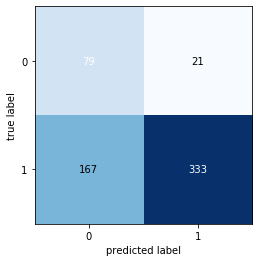

In [25]:
fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_yelp, bnb.predict(X_yelp)))
plt.show()

138 positive Bewertungen wurden als negativ klassifiziert (False-Positives oder Fehler 1. Art bei Nullhypothese: *Eine Bewertung ist positiv*) und 31 negative Bewertungen wurden als positiv klassifiziert (False-Negatives oder Fehler 2. Art). Das Modell begeht also ~4 mal so häufig einen Fehler 1. Art. Es liegt also ein Bias zugunsten einer negativen Bewertung vor. Dies ist nicht weiter verwunderlich, da das Modell an einem ausbalancierten Datensatz trainiert wurde. 

In [26]:
yelp_nmb = y_yelp.count()
yelp_nmbpos = np.count_nonzero(y_yelp)
yelp_nmbneg = yelp_nmb - yelp_nmbpos
if yelp_nmbpos >= yelp_nmbneg:
    print('Die Null-Accuracy ist das Verhältnis der positiven Bewertungen zu allen')
else:
    print('Die Null-Accuracy ist das Verhältnis der negativen Bewertungen zu allen')

Die Null-Accuracy ist das Verhältnis der positiven Bewertungen zu allen


Welche Genauigkeit würde also ein "dummes" Modell erzielen, welches immer nur ein positives Sentiment annimmt?

In [27]:
yelp_nacc = 100*yelp_nmbpos/yelp_nmb
print("Die Null-Accuracy beträgt ~{0:.2f}% .".format(yelp_nacc))

Die Null-Accuracy beträgt ~83.33% .


Das so erzielte Ergebnis ist also besser als das trainierte Modell! Wenn ein Modell diese Null-Accuracy nicht übertrifft, kann es eigentlich verworfen werden...